# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [390]:
# Import warnings
import warnings

In [391]:
# Import the libraries you will be using for analysis
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

In [392]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.4
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [393]:
# Try loading one file
df1 = pd.read_parquet(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Python\Code\Practice\EDA_assignment\Datasets and Dictionary\trip_records\2023-1.parquet"
)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [394]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [395]:
# from google.colab import drive
# drive.mount('/content/drive')

In [396]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

data_directory = r"C:\ZTalJaZ\Storage\MasterOfDataScience\Python\Code\Practice\EDA_assignment\Datasets and Dictionary\trip_records"

all_files = os.listdir(data_directory)

file_list = [f for f in all_files if f.endswith(".parquet") and f.startswith("2023-")]

final_df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        file_path = os.path.join(data_directory, file_name)

        df_month = pd.read_parquet(file_path)

        df_month["tpep_pickup_datetime"] = pd.to_datetime(
            df_month["tpep_pickup_datetime"], errors="coerce"
        )

        monthly_samples_list = []

        unique_dates = df_month["tpep_pickup_datetime"].dt.date.unique()

        # Loop through each unique date
        for single_date in unique_dates:
            df_date = df_month[df_month["tpep_pickup_datetime"].dt.date == single_date]

            for hour in range(24):
                df_hour = df_date[df_date["tpep_pickup_datetime"].dt.hour == hour]

                if not df_hour.empty:
                    sampled_hour_data = df_hour.sample(
                        frac=0.05, replace=False, random_state=42
                    )

                    if not sampled_hour_data.empty:
                        monthly_samples_list.append(sampled_hour_data)

        if monthly_samples_list:
            sampled_month_df = pd.concat(monthly_samples_list, ignore_index=True)
            final_df = pd.concat(
                [final_df, sampled_month_df], ignore_index=True
            )
        else:
            print("This month as no data")

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [397]:
# Store the df in csv/parquet
final_df.to_parquet(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Python\Code\Practice\EDA_assignment\Datasets and Dictionary\store.parquet",
    index=False,
)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [398]:
# Load the new data file
df = pd.read_parquet(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Python\Code\Practice\EDA_assignment\Datasets and Dictionary\store.parquet",
)

In [399]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.4,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.4,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [401]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(columns=['store_and_fwd_flag'], inplace=True, errors='ignore')


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [402]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)
df.drop(columns=['Airport_fee'], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [403]:
# check where values of fare amount are negative
display(df[df["fare_amount"] < 0], df[df["fare_amount"] < 0].shape[0])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


0

Did you notice something different in the `RatecodeID` column for above records?

In [404]:
# Analyse RatecodeID for the negative fare amounts
df[df["fare_amount"] < 0]["RatecodeID"].value_counts()

Series([], Name: count, dtype: int64)

In [405]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include=np.number)
(numeric_df < 0).any()

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                     True
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge      True
airport_fee               True
dtype: bool

In [406]:
# fix these negative values
df.loc[df["mta_tax"] < 0, "mta_tax"] = 0
df.loc[df["extra"] < 0, "extra"] = 0
df.loc[df["improvement_surcharge"] < 0, "improvement_surcharge"] = 0
df.loc[df["total_amount"] < 0, "total_amount"] = 0
df.loc[df["congestion_surcharge"] < 0, "congestion_surcharge"] = 0
df.loc[df["airport_fee"] < 0, "airport_fee"] = 0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [407]:
# Find the proportion of missing values in each column
missing_values = df.isnull().mean() * 100

missing_values

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [408]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
mode_value = df['passenger_count'].mode()[0]

df['passenger_count'] = df['passenger_count'].fillna(mode_value)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [409]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [410]:
# handle null values in congestion_surcharge
print(
    "Check percentage:",
    df["congestion_surcharge"].value_counts(normalize=True) * 100,
)

df["congestion_surcharge"] = df["congestion_surcharge"].fillna(0.00)

Check percentage: congestion_surcharge
2.5    92.304013
0.0     7.695932
0.5     0.000055
Name: proportion, dtype: float64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [411]:
# Handle any remaining missing values
# Check for any remaining missing values in the dataframe
remaining_missing = df.isnull().sum()
print("Remaining missing values in dataset", remaining_missing[remaining_missing > 0])

Remaining missing values in dataset Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [412]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
VendorID,1896400.0,1.733026,1.0,1.0,2.0,2.0,6.0,0.44764
tpep_pickup_datetime,1896400,2023-07-02 19:59:52.930795,2022-12-31 23:51:30,2023-04-02 16:10:08.750000,2023-06-27 15:44:22.500000,2023-10-06 19:37:45,2023-12-31 23:57:51,NaN
tpep_dropoff_datetime,1896400,2023-07-02 20:17:18.919563,2022-12-31 23:56:06,2023-04-02 16:27:43.500000,2023-06-27 16:01:15,2023-10-06 19:53:39,2024-01-01 20:50:55,NaN
passenger_count,1896400.0,1.356585,0.0,1.0,1.0,1.0,9.0,0.879916
trip_distance,1896400.0,3.858293,0.0,1.05,1.79,3.4,126360.46,129.40854
RatecodeID,1896400.0,1.578772,0.0,1.0,1.0,1.0,99.0,7.272418
PULocationID,1896400.0,165.281376,1.0,132.0,162.0,234.0,265.0,64.000377
DOLocationID,1896400.0,164.05152,1.0,114.0,162.0,234.0,265.0,69.802066
payment_type,1896400.0,1.163817,0.0,1.0,1.0,1.0,4.0,0.508138
fare_amount,1896400.0,19.91935,0.0,9.3,13.5,21.9,143163.45,105.537084


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [413]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [414]:
# Continue with outlier handling
# Drop trip_distance = ~0 and fare_amount > 300
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] <= 300)]
# Drop trip_distance=0, fare_amount=0 AND PULocationID != DOLocationID
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
# Drop payment_type not in 1 to 6
df = df[df['payment_type'].isin([1, 2, 3, 4, 5, 6])]
# Drop RatecodeID not in 1 to 6
df = df[df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])]

# Remove outliers for fare_amount
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

# Remove outliers for trip_distance
Q1a = df['trip_distance'].quantile(0.25)
Q3a = df['trip_distance'].quantile(0.75)
IQRa = Q3 - Q1
lower_bounda = Q1a - 1.5 * IQRa
upper_bounda = Q3a + 1.5 * IQRa
df = df[(df['trip_distance'] >= lower_bounda) & (df['trip_distance'] <= upper_bounda)]

# Remove outliers for total_amount
Q1b = df['total_amount'].quantile(0.25)
Q3b = df['total_amount'].quantile(0.75)
IQRb = Q3b - Q1b
lower_boundb = Q1b - 1.5 * IQRb
upper_boundb = Q3b + 1.5 * IQRb
df = df[(df['total_amount'] >= lower_boundb) & (df['total_amount'] <= upper_boundb)]

In [415]:
# Do any columns need standardising?
# Correct the column RatecodeID to be an integer
df['RatecodeID'] = df['RatecodeID'].astype(int)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [416]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

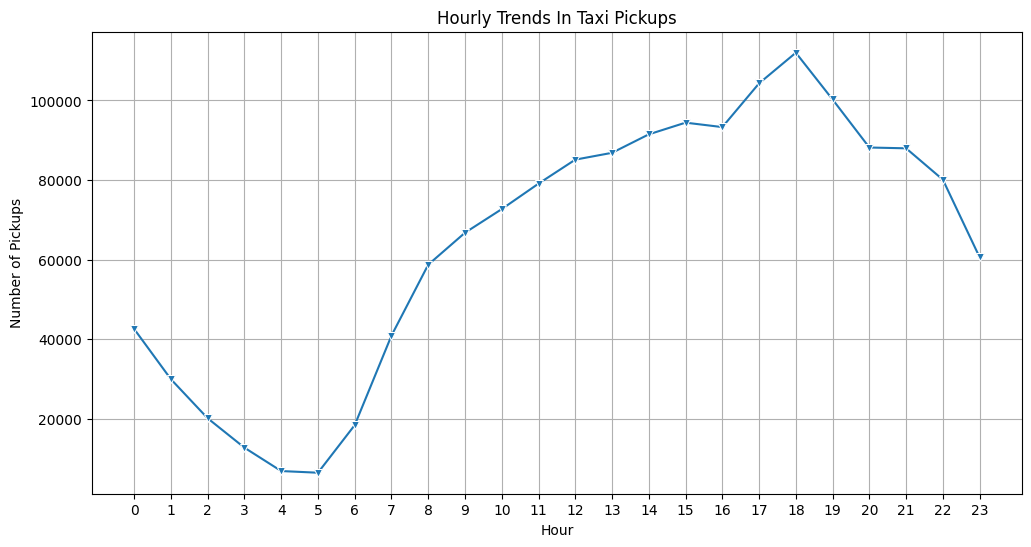

In [417]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickups = df.groupby('pickup_hour').size().reset_index(name='pickup_count')
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pickups, x='pickup_hour', y='pickup_count', marker='v')
plt.title('Hourly Trends In Taxi Pickups')
plt.xlabel('Hour')
plt.ylabel('Number of Pickups')
plt.xticks(hourly_pickups['pickup_hour'])
plt.grid()
plt.show()

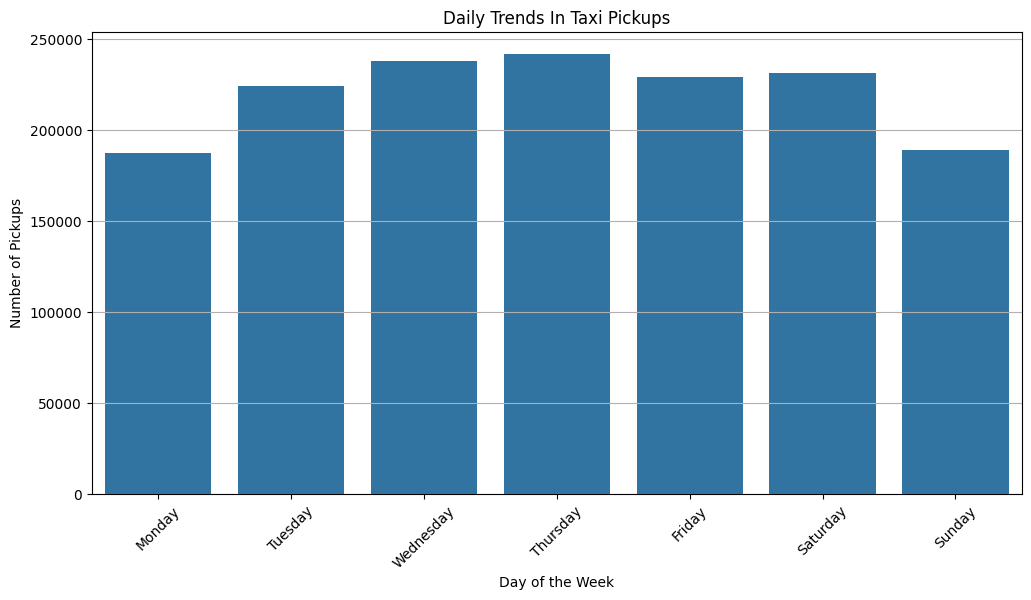

In [418]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
daily_pickups = df.groupby('pickup_day').size().reset_index(name='pickup_count')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups['pickup_day'] = pd.Categorical(daily_pickups['pickup_day'], categories=days_order, ordered=True)
daily_pickups = daily_pickups.sort_values('pickup_day')
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_pickups, x='pickup_day', y='pickup_count')
plt.title('Daily Trends In Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

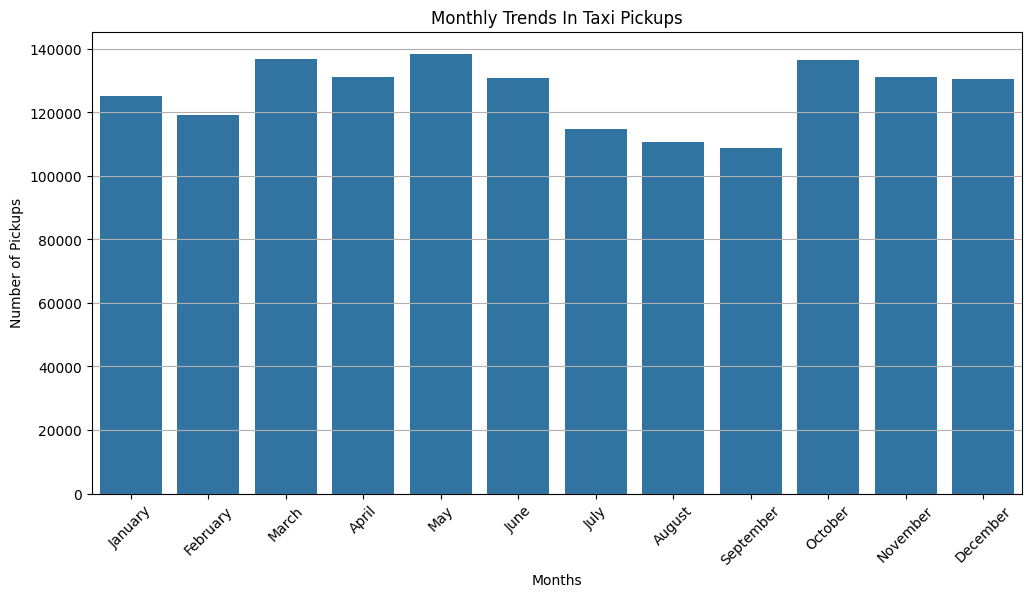

In [458]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
monthly_pickups = df.groupby('pickup_month').size().reset_index(name='pickup_count')
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups['pickup_month'] = pd.Categorical(monthly_pickups['pickup_month'], categories=months_order, ordered=True)
monthly_pickups = monthly_pickups.sort_values('pickup_month')
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_pickups, x='pickup_month', y='pickup_count')
plt.title('Monthly Trends In Taxi Pickups')
plt.xlabel('Months')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [420]:
# Analyse the above parameters
# Check for negative values in fare_amount, tip_amount, total_amount and trip_amount
negative_values = df[(df['fare_amount'] < 0) | (df['tip_amount'] < 0) | (df['total_amount'] < 0) | (df['trip_distance'] < 0)]
print("Negative values for fare_amount, tip_amount, total_amount and trip_distance:", negative_values.shape[0])
# Check for zero values in fare_amount, tip_amount, total_amount and trip_distance
zero_values = df[(df['fare_amount'] == 0) | (df['tip_amount'] == 0) | (df['total_amount'] == 0) | (df['trip_distance'] == 0)]
print("Zero values for fare_amount, tip_amount, total_amount and trip_distance:", zero_values.shape[0])

Negative values for fare_amount, tip_amount, total_amount and trip_distance: 0
Zero values for fare_amount, tip_amount, total_amount and trip_distance: 333343


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [421]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[(df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [422]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.to_period('M')).agg(
    total_fare_amount=('fare_amount', 'sum'),
    total_tip_amount=('tip_amount', 'sum'),
    total_trip_distance=('trip_distance', 'sum'),
    total_revenue=('total_amount', 'sum')
).reset_index()

monthly_revenue = monthly_revenue[monthly_revenue['tpep_pickup_datetime'].dt.year == 2023]

monthly_revenue

,tpep_pickup_datetime,total_fare_amount,total_tip_amount,total_trip_distance,total_revenue
1,2023-01,1293091.14,323091.56,194601.50,2088614.81
2,2023-02,1251674.72,312174.06,184948.83,2019613.88
3,2023-03,1454508.01,362121.66,211681.52,2343106.17
4,2023-04,1393006.41,345729.36,202349.33,2233728.63
5,2023-05,1515825.67,372609.92,214584.86,2419602.29
6,2023-06,1417701.06,349712.77,202144.80,2267585.77
7,2023-07,1189949.02,294732.17,173090.11,1907210.04
8,2023-08,1143410.45,284770.21,167913.56,1839219.49
9,2023-09,1201688.83,293782.70,162128.36,1910637.61
10,2023-10,1524534.98,374935.49,207283.38,2424622.96


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

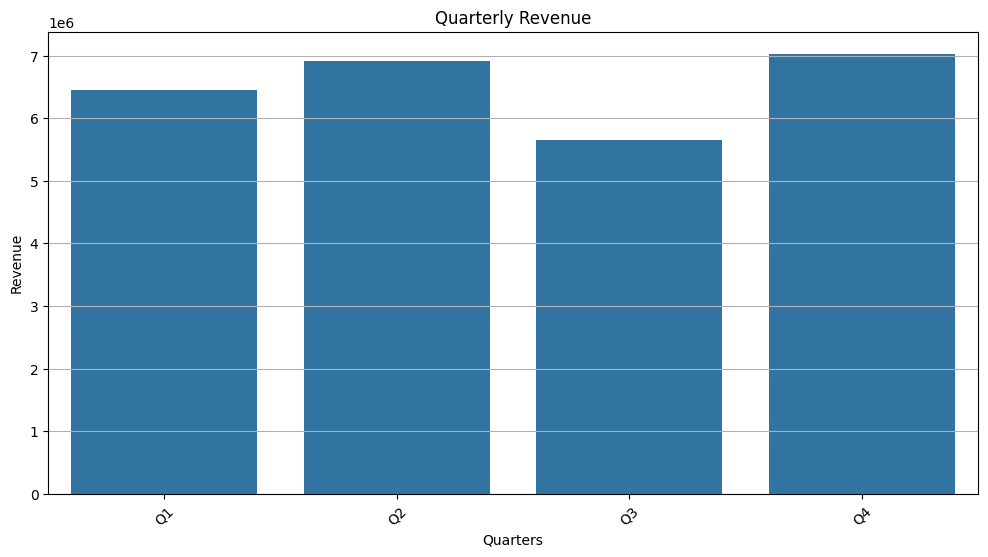

In [459]:
# Calculate proportion of each quarter
monthly_revenue['quarter'] = monthly_revenue['tpep_pickup_datetime'].dt.quarter
monthly_revenue['quarter'] = 'Q' + monthly_revenue['quarter'].astype(str)
monthly_revenue['quarter'] = pd.Categorical(monthly_revenue['quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)

quarterly_revenue = monthly_revenue.groupby('quarter', observed=True).agg(
    total_fare_amount=('total_fare_amount', 'sum'),
    total_tip_amount=('total_tip_amount', 'sum'),
    total_trip_distance=('total_trip_distance', 'sum'),
    total_revenue=('total_revenue', 'sum')
).reset_index()
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_revenue, x='quarter', y='total_revenue')
plt.title('Quarterly Revenue')
plt.xlabel('Quarters')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

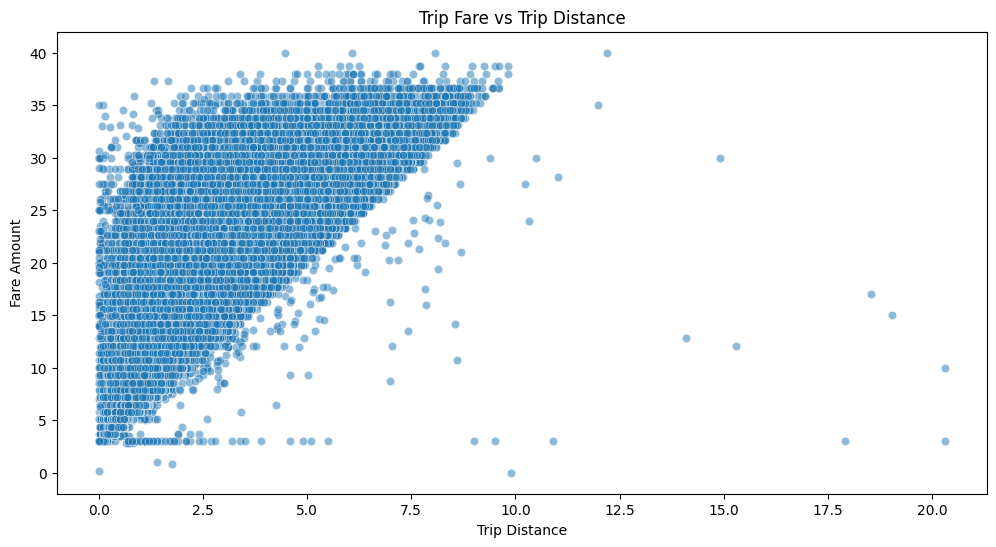

In [424]:
# Show how trip fare is affected by distance
df_non_zero = df_non_zero[df_non_zero['trip_distance'] > 0]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_non_zero, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Trip Fare vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

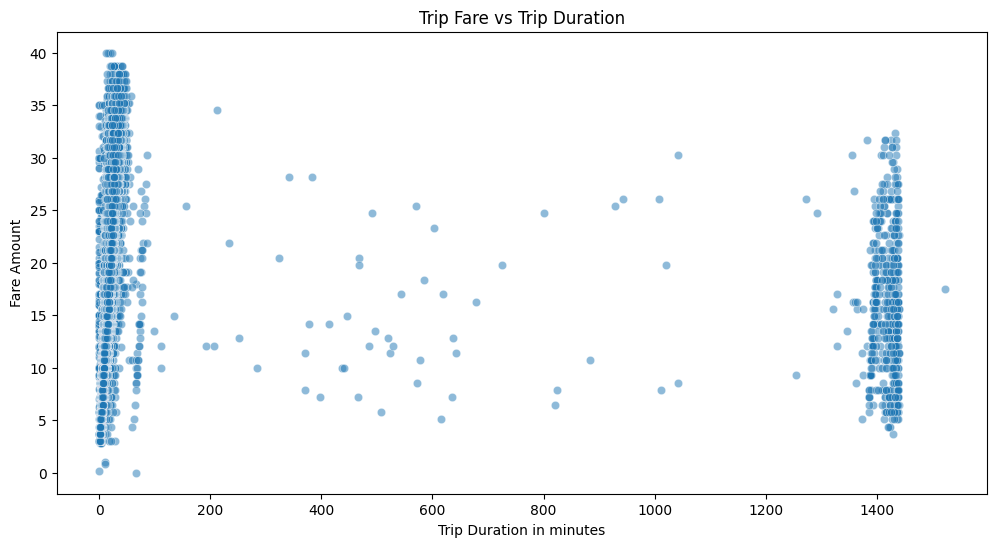

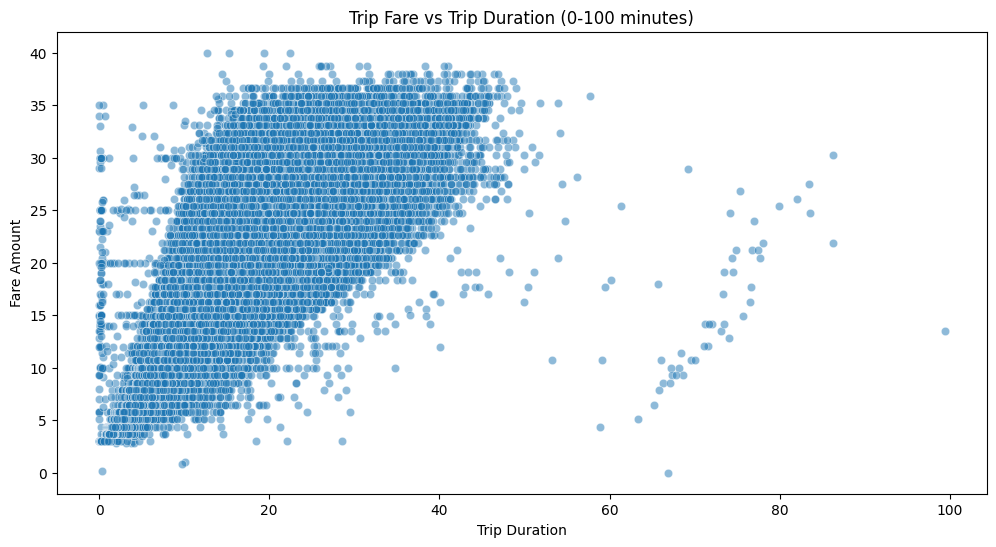

In [425]:
# Show relationship between fare and trip duration
df_non_zero['trip_duration'] = (df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']).dt.total_seconds() / 60.0
df_non_zero = df_non_zero[df_non_zero['trip_duration'] > 0]
# Full plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_non_zero, x='trip_duration', y='fare_amount', alpha=0.5)
plt.title('Trip Fare vs Trip Duration')
plt.xlabel('Trip Duration in minutes')
plt.ylabel('Fare Amount')
plt.show()

# Plot with trip duration <= 100
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_non_zero[df_non_zero['trip_duration'] <= 100], x='trip_duration', y='fare_amount', alpha=0.5)
plt.title('Trip Fare vs Trip Duration (0-100 minutes)')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()


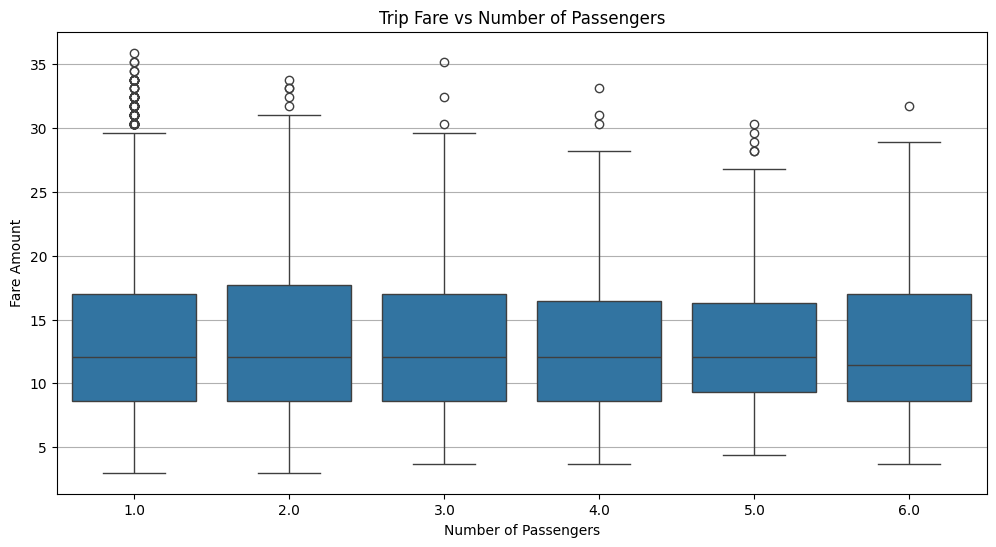

In [426]:
# Show relationship between fare and number of passengers
df_sample = df_non_zero.sample(frac=0.01, random_state=42)
df_sample = df_sample[df_sample['passenger_count'].between(1, 6)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sample, x='passenger_count', y='fare_amount')
plt.title('Trip Fare vs Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.grid(axis='y')
plt.show()

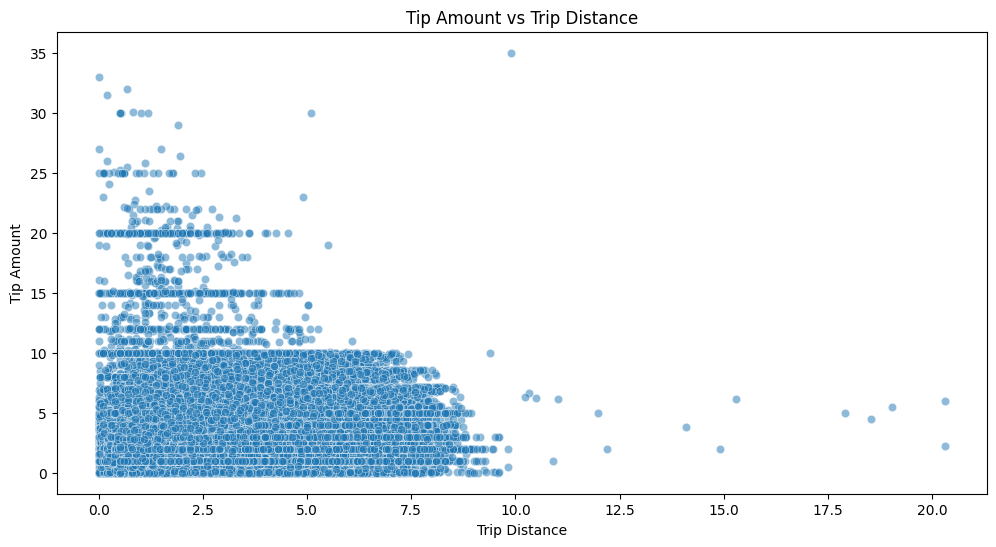

In [427]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_non_zero, x='trip_distance', y='tip_amount', alpha=0.5)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

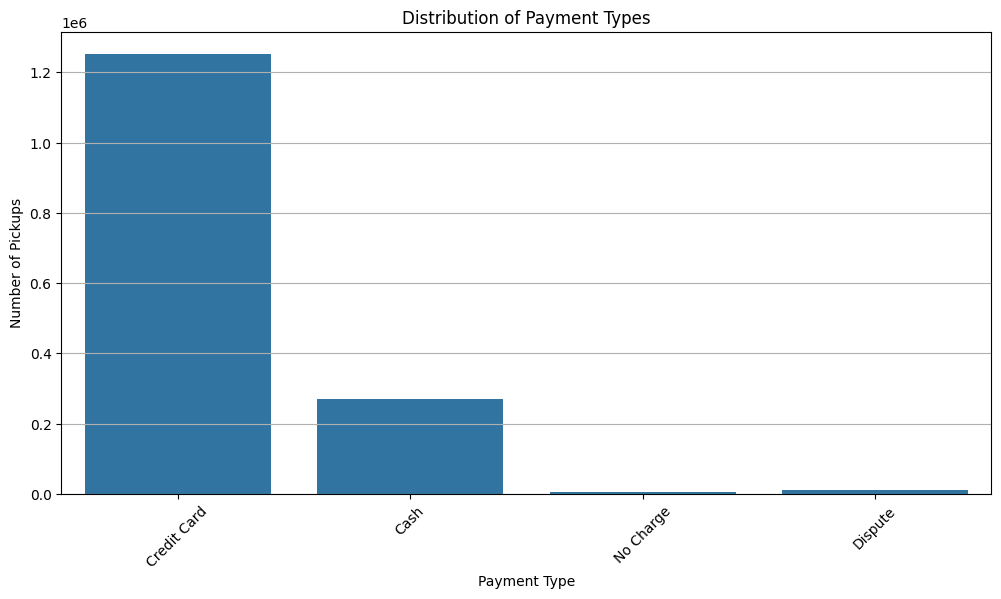

In [428]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df.groupby("payment_type").size().reset_index(name="pickup_count")
payment_type_map = {1: "Credit Card", 2: "Cash", 3: "No Charge", 4: "Dispute"}
payment_type_counts["payment_type"] = payment_type_counts["payment_type"].map(payment_type_map)

#  Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=payment_type_counts, x="payment_type", y="pickup_count")
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [429]:
# %pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [430]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Python\Code\Practice\EDA_assignment\Datasets and Dictionary\taxi_zones\taxi_zones.shp"
)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

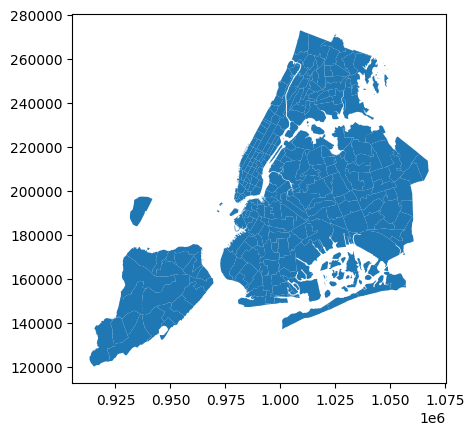

In [431]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [432]:
# Merge zones and trip records using locationID and PULocationID
df_merged = pd.merge(df, zones, left_on="PULocationID", right_on="LocationID", how="left")

df_merged.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_hour,pickup_day,pickup_month,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1,138,256,2,32.4,...,0,Sunday,January,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1,161,237,1,7.9,...,0,Sunday,January,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1,237,141,2,11.4,...,0,Sunday,January,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [433]:
# Group data by location and calculate the number of trips
trips_count = df_merged.groupby("zone").size().reset_index(name="trips_count")
trips_count = trips_count.sort_values(by="trips_count", ascending=False)

trips_count.head(10)

,zone,trips_count
210,Upper East Side South,83353
140,Midtown Center,78731
209,Upper East Side North,73793
141,Midtown East,60696
165,Penn Station/Madison Sq West,58400
122,Lincoln Square East,57650
203,Times Sq/Theatre District,52957
149,Murray Hill,50408
142,Midtown North,49202
212,Upper West Side South,47769


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [434]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_count, left_on="zone", right_on="zone", how="left")
zones["trips_count"] = zones["trips_count"].fillna(0)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

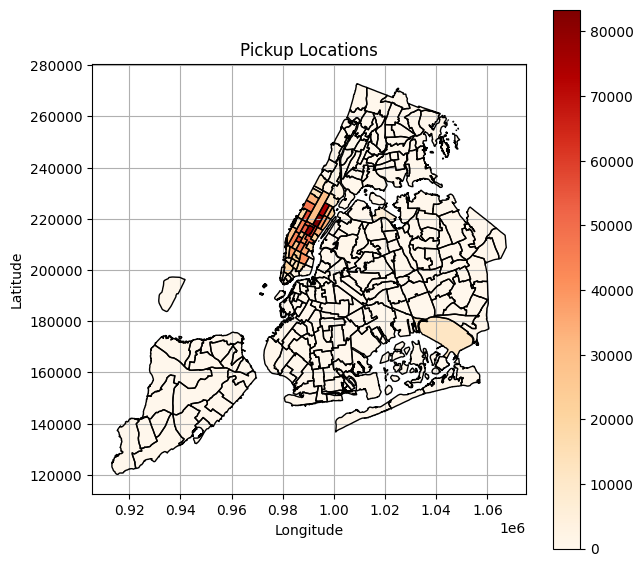

In [435]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the map and display it
zones.boundary.plot(ax=ax, linewidth=1, color="black")
zones.plot(column="trips_count", ax=ax, cmap="OrRd", legend=True)
plt.title("Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

In [436]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by="trips_count", ascending=False)

zones_sorted.head(5)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trips_count
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",83353.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",78731.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",73793.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",60696.0
185,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",58400.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

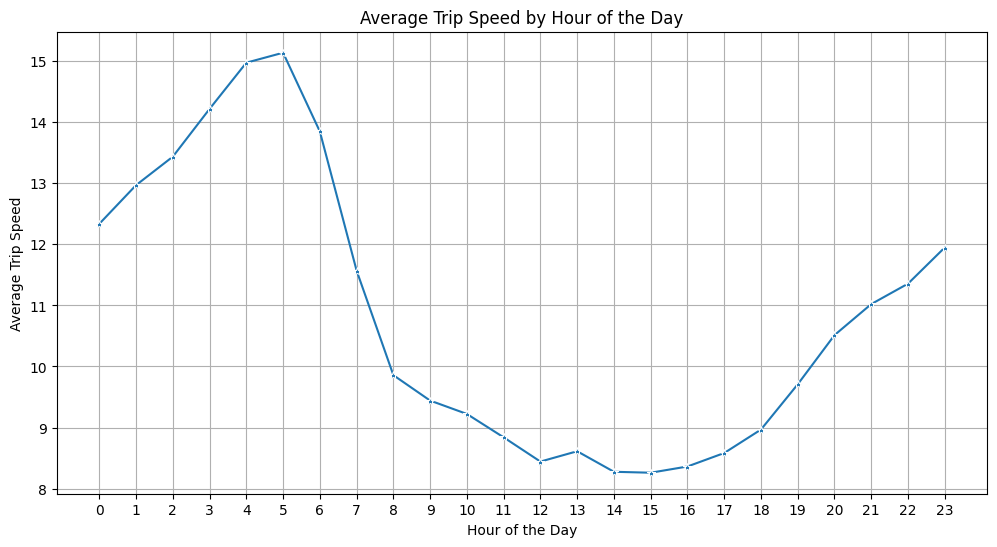

,Pickup Zone,Dropoff Zone,Average Speed
0,JFK Airport,Madison,0.02
1,Clinton East,Pelham Bay Park,0.13
2,Bensonhurst West,Bensonhurst West,0.31
3,Meatpacking/West Village West,South Williamsburg,0.52
4,Roosevelt Island,East Chelsea,1.87
5,Astoria,NaN,2.01
6,Highbridge,West Concourse,2.20
7,Flatiron,NaN,3.04
8,West Concourse,NaN,3.25
9,Ocean Parkway South,Ocean Parkway South,3.43


In [437]:
# Find routes which have the slowest speeds at different times of the day
df_non_zero['trip_speed'] = (df_non_zero['trip_distance'] / ((df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']).dt.total_seconds() / 3600.0)).round(2)
df_non_zero['pickup_hour'] = df_non_zero['tpep_pickup_datetime'].dt.hour
hourly_speed = df_non_zero.groupby('pickup_hour')['trip_speed'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_speed, x='pickup_hour', y='trip_speed', marker='*')
plt.title('Average Trip Speed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Speed')
plt.xticks(hourly_speed['pickup_hour'])
plt.grid()
plt.show()

route_speed = df_non_zero.groupby(['PULocationID', 'DOLocationID'])['trip_speed'].mean().reset_index()
route_speed = route_speed.sort_values(by='trip_speed', ascending=True)
slowest_routes = route_speed.head(10)
slowest_routes = slowest_routes.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
slowest_routes = slowest_routes.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_PU', '_DO'))
slowest_routes = slowest_routes[['zone_PU', 'zone_DO', 'trip_speed']].rename(columns={'zone_PU': 'Pickup Zone', 'zone_DO': 'Dropoff Zone', 'trip_speed': 'Average Speed'})
# slowest_routes.reset_index(drop=True, inplace=True)
slowest_routes

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

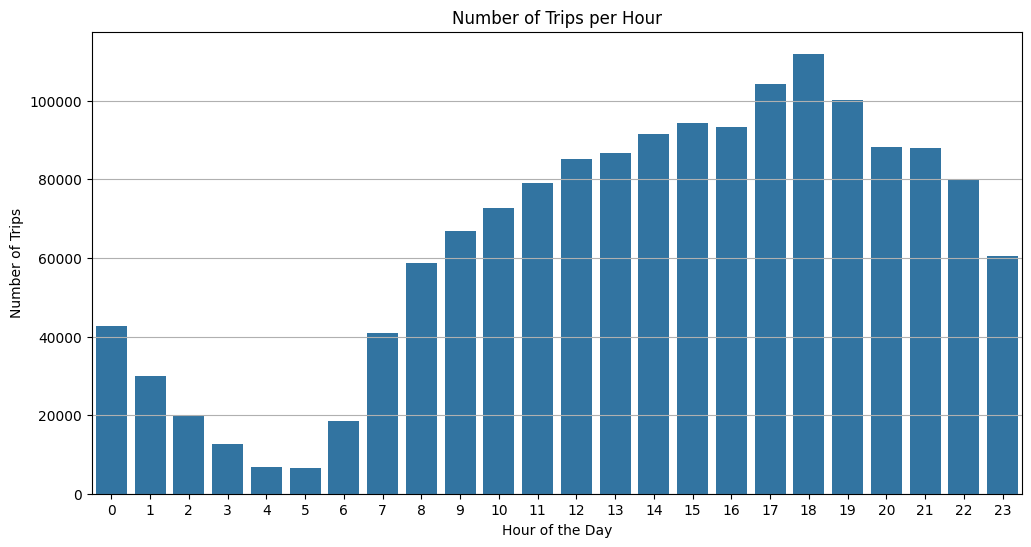

In [438]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = df.groupby(df['tpep_pickup_datetime'].dt.hour).size().reset_index(name='trip_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_trips, x='tpep_pickup_datetime', y='trip_count')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(hourly_trips['tpep_pickup_datetime'])
plt.grid(axis='y')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [439]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
hourly_trips['scaled_trip_count'] = hourly_trips['trip_count'] / sample_fraction
hourly_trips.sort_values(by='scaled_trip_count', ascending=False, inplace=True)

hourly_trips[['tpep_pickup_datetime', 'trip_count', 'scaled_trip_count']].head(5)

,tpep_pickup_datetime,trip_count,scaled_trip_count
18,18,111978,2239560.0
17,17,104281,2085620.0
19,19,100229,2004580.0
15,15,94409,1888180.0
16,16,93293,1865860.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

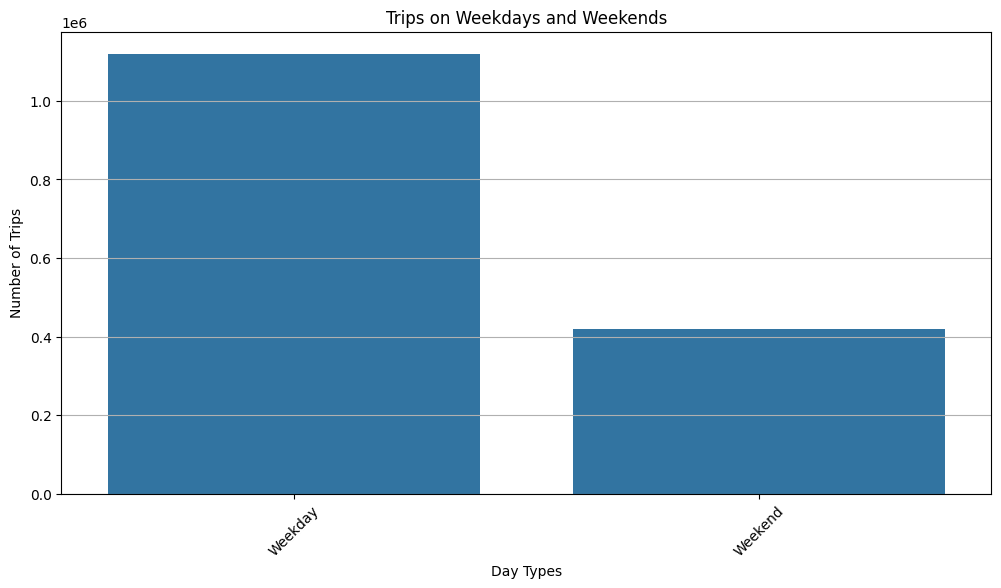

In [440]:
# Compare traffic trends for the week days and weekends
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['weekend'] = df['pickup_day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
weekend_trips = df.groupby('weekend').size().reset_index(name='trip_count')
weekend_trips['weekend'] = weekend_trips['weekend'].map({0: 'Weekday', 1: 'Weekend'})
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weekend_trips, x='weekend', y='trip_count')
plt.title('Trips on Weekdays and Weekends')
plt.xlabel('Day Types')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [441]:
# Find top 10 pickup and dropoff zones
# Top 10 pickup zones
top_pickup_zones = df["PULocationID"].value_counts().head(10).reset_index()
top_pickup_zones.columns = ["PULocationID", "pickup_count"]
top_pickup_zones = top_pickup_zones.merge(
    zones[["LocationID", "zone"]],
    left_on="PULocationID",
    right_on="LocationID",
    how="left",
)
top_pickup_zones = top_pickup_zones[["zone", "pickup_count"]].rename(
    columns={"zone": "Pickup Zone"}
)
top_pickup_zones.reset_index(drop=True, inplace=True)
print("Top 10 Pickup Zones:", top_pickup_zones)

# Top 10 dropoff zones
top_dropoff_zones = df["DOLocationID"].value_counts().head(10).reset_index()
top_dropoff_zones.columns = ["DOLocationID", "dropoff_count"]

top_dropoff_zones = top_dropoff_zones.merge(
    zones[["LocationID", "zone"]],
    left_on="DOLocationID",
    right_on="LocationID",
    how="left",
)
top_dropoff_zones = top_dropoff_zones[["zone", "dropoff_count"]].rename(
    columns={"zone": "Dropoff Zone"}
)
top_dropoff_zones.reset_index(drop=True, inplace=True)
print("Top 10 Dropoff Zones:", top_dropoff_zones)

Top 10 Pickup Zones:                     Pickup Zone  pickup_count
0         Upper East Side South         83353
1                Midtown Center         78731
2         Upper East Side North         73793
3                  Midtown East         60696
4  Penn Station/Madison Sq West         58400
5           Lincoln Square East         57650
6     Times Sq/Theatre District         52957
7                   Murray Hill         50408
8                 Midtown North         49202
9         Upper West Side South         47769
Top 10 Dropoff Zones:                 Dropoff Zone  dropoff_count
0      Upper East Side North          76766
1      Upper East Side South          74166
2             Midtown Center          65273
3                Murray Hill          49645
4        Lincoln Square East          48373
5               Midtown East          47373
6      Upper West Side South          47168
7  Times Sq/Theatre District          45878
8            Lenox Hill West          45428
9          

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [442]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')
zones_ratio = zones[['LocationID', 'zone', 'borough']].copy()
zones_ratio = zones_ratio.merge(pickup_counts, left_on='LocationID', right_on='PULocationID', how='left')
zones_ratio = zones_ratio.merge(dropoff_counts, left_on='LocationID', right_on='DOLocationID', how='left')

zones_ratio['pickup_count'] = zones_ratio['pickup_count'].fillna(0).astype(int)
zones_ratio['dropoff_count'] = zones_ratio['dropoff_count'].fillna(0).astype(int)

zones_ratio['pickup_dropoff_ratio'] = zones_ratio['pickup_count'] / zones_ratio['dropoff_count']
zones_ratio['pickup_dropoff_ratio'] = zones_ratio['pickup_dropoff_ratio'].replace([np.inf, -np.inf], np.nan)

zones_ratio = zones_ratio[['zone', 'borough', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']]

top_pickup_ratio = zones_ratio.sort_values(by='pickup_dropoff_ratio', ascending=False, na_position='last').head(10)
print('Top 10')
print(top_pickup_ratio[['zone', 'pickup_dropoff_ratio']])

bottom_pickup_ratio = zones_ratio.sort_values(by='pickup_dropoff_ratio', ascending=True, na_position='last').head(10)
print('Bottom 10')
print(bottom_pickup_ratio[['zone', 'pickup_dropoff_ratio']])


Top 10
                                zone  pickup_dropoff_ratio
137                LaGuardia Airport              8.491848
131                      JFK Airport              7.050572
69                     East Elmhurst              2.596244
153  Marine Park/Floyd Bennett Field              2.111111
43            Charleston/Tottenville              2.000000
203                Rossville/Woodrow              2.000000
185     Penn Station/Madison Sq West              1.561581
10                        Bath Beach              1.500000
28                    Brighton Beach              1.400000
113          Greenwich Village South              1.383916
Bottom 10
                         zone  pickup_dropoff_ratio
1                 Jamaica Bay                   0.0
7                Astoria Park                   0.0
14    Bay Terrace/Fort Totten                   0.0
15                    Bayside                   0.0
29              Broad Channel                   0.0
98            Freshkil

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [443]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Top 10 pickup zones during night hours
top_night_pickup_zones = night_hours['PULocationID'].value_counts().head(10).reset_index()
top_night_pickup_zones.columns = ['PULocationID', 'pickup_count']
top_night_pickup_zones = top_night_pickup_zones.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
top_night_pickup_zones = top_night_pickup_zones[['zone', 'pickup_count']].rename(columns={'zone': 'Pickup Zone'})
top_night_pickup_zones.reset_index(drop=True, inplace=True)
print("Top 10 Night Pickup Zones:")
print(top_night_pickup_zones)
# Top 10 dropoff zones during night hours
top_night_dropoff_zones = night_hours['DOLocationID'].value_counts().head(10).reset_index()
top_night_dropoff_zones.columns = ['DOLocationID', 'dropoff_count']
top_night_dropoff_zones = top_night_dropoff_zones.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
top_night_dropoff_zones = top_night_dropoff_zones[['zone', 'dropoff_count']].rename(columns={'zone': 'Dropoff Zone'})
top_night_dropoff_zones.reset_index(drop=True, inplace=True)
print("Top 10 Night Dropoff Zones:")
print(top_night_dropoff_zones)

Top 10 Night Pickup Zones:
                    Pickup Zone  pickup_count
0                  East Village         14666
1                  West Village         11572
2                  Clinton East          9406
3               Lower East Side          8948
4       Greenwich Village South          8229
5     Times Sq/Theatre District          7010
6  Penn Station/Madison Sq West          6222
7                 Midtown South          5598
8                  East Chelsea          5365
9                      Gramercy          5277
Top 10 Night Dropoff Zones:
                    Dropoff Zone  dropoff_count
0                   East Village           7896
1                   Clinton East           6350
2                    Murray Hill           5837
3                       Gramercy           5446
4                   East Chelsea           5414
5                Lenox Hill West           4912
6                   West Village           4734
7                 Yorkville West           4522
8      

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

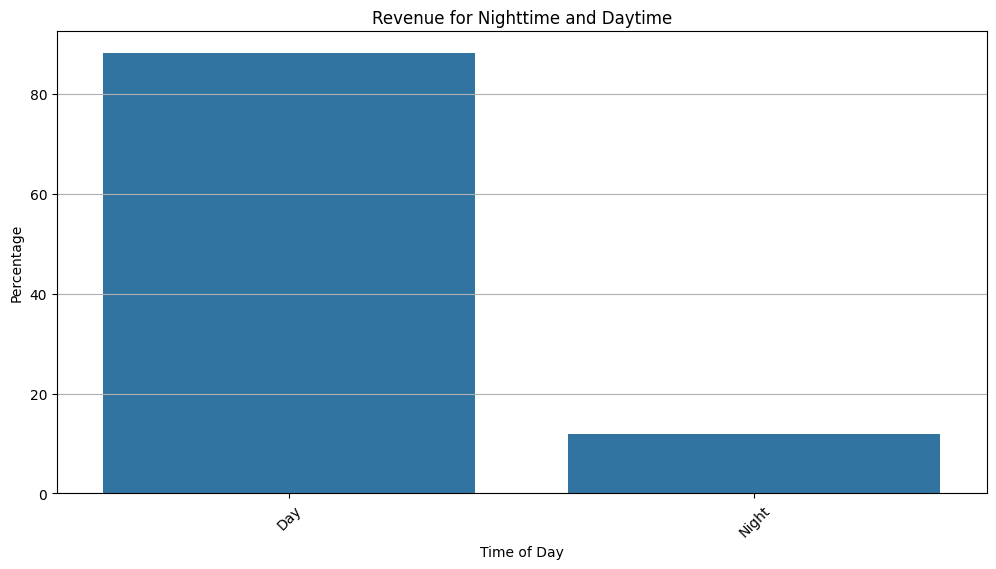

In [444]:
# Filter for night hours (11 PM to 5 AM)
df['time_of_day'] = df['pickup_hour'].apply(lambda x: 'Night' if (x >= 23 or x <= 5) else 'Day')
revenue_share = df.groupby('time_of_day')['total_amount'].sum().reset_index()
revenue_share['percentage_share'] = (revenue_share['total_amount'] / revenue_share['total_amount'].sum()) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_share, x='time_of_day', y='percentage_share')
plt.title('Revenue for Nighttime and Daytime')
plt.xlabel('Time of Day')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

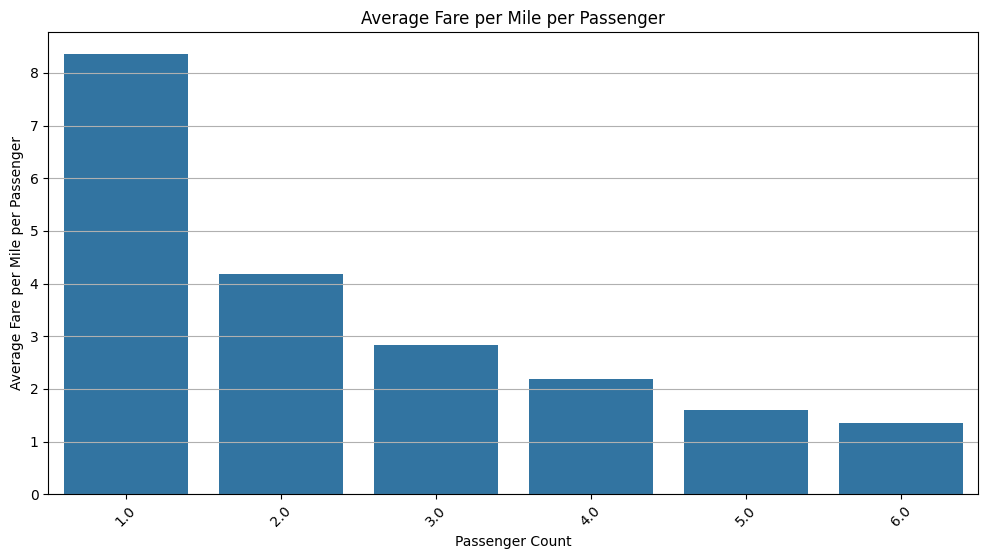

In [445]:
# Analyse the fare per mile per passenger for different passenger counts
df_non_zero = df_non_zero[df_non_zero['passenger_count'] > 0]
df_non_zero['fare_per_mile_per_passenger'] = (df_non_zero['fare_amount'] / df_non_zero['trip_distance']) / df_non_zero['passenger_count']
fare_per_mile_per_passenger = df_non_zero.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=fare_per_mile_per_passenger, x='passenger_count', y='fare_per_mile_per_passenger')
plt.title('Average Fare per Mile per Passenger')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

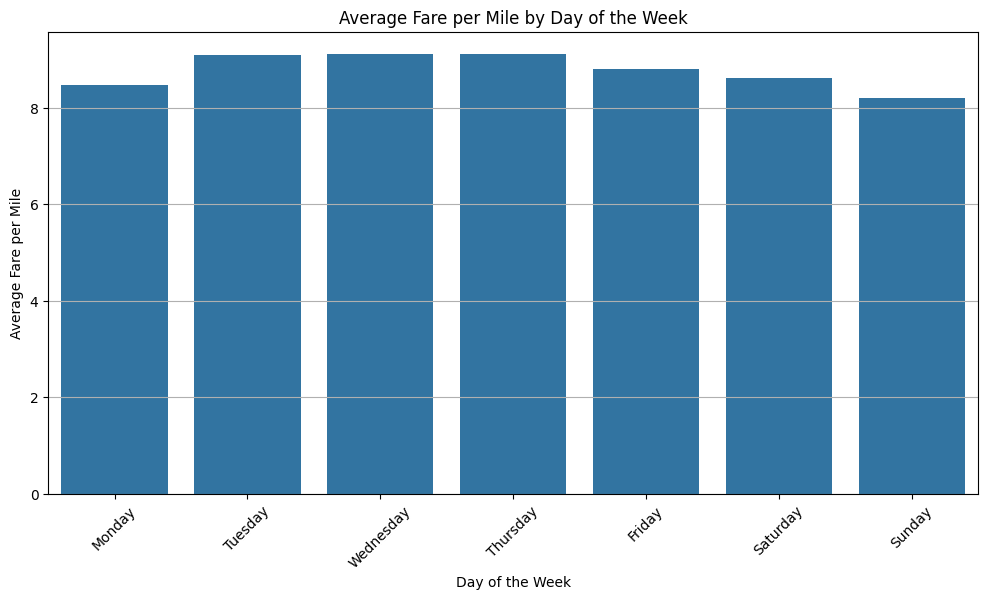

In [446]:
# Compare the average fare per mile for different days and for different times of the day
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
fare_per_mile_by_day = df.groupby('pickup_day')['fare_per_mile'].mean().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_per_mile_by_day['pickup_day'] = pd.Categorical(fare_per_mile_by_day['pickup_day'], categories=days_order, ordered=True)
fare_per_mile_by_day = fare_per_mile_by_day.sort_values('pickup_day')
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=fare_per_mile_by_day, x='pickup_day', y='fare_per_mile')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

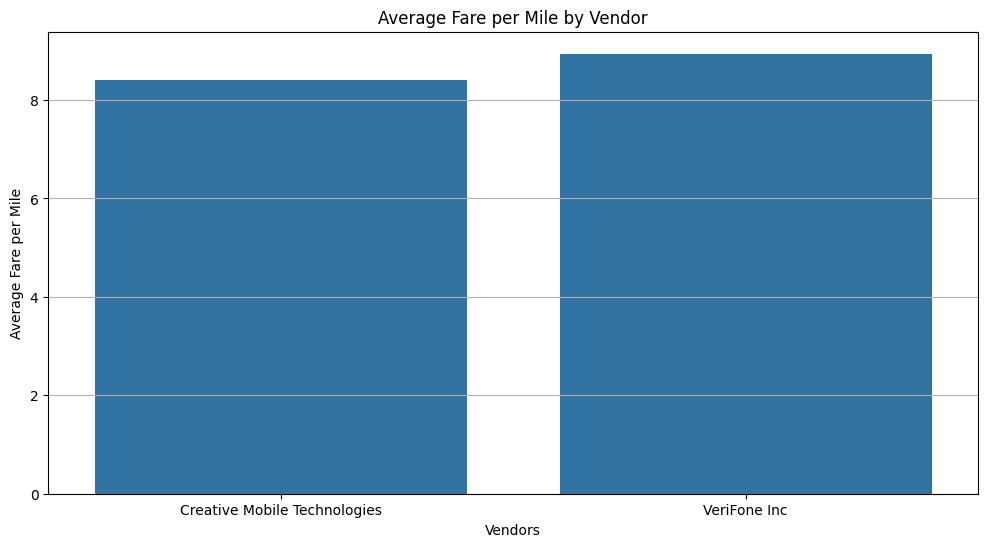

In [447]:
# Compare fare per mile for different vendors
fare_per_mile_by_vendor = df.groupby('VendorID')['fare_per_mile'].mean().reset_index()
vendor_map = {1: 'Creative Mobile Technologies', 2: 'VeriFone Inc'}
fare_per_mile_by_vendor['VendorID'] = fare_per_mile_by_vendor['VendorID'].map(vendor_map)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=fare_per_mile_by_vendor, x='VendorID', y='fare_per_mile')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendors')
plt.ylabel('Average Fare per Mile')
plt.grid(axis='y')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


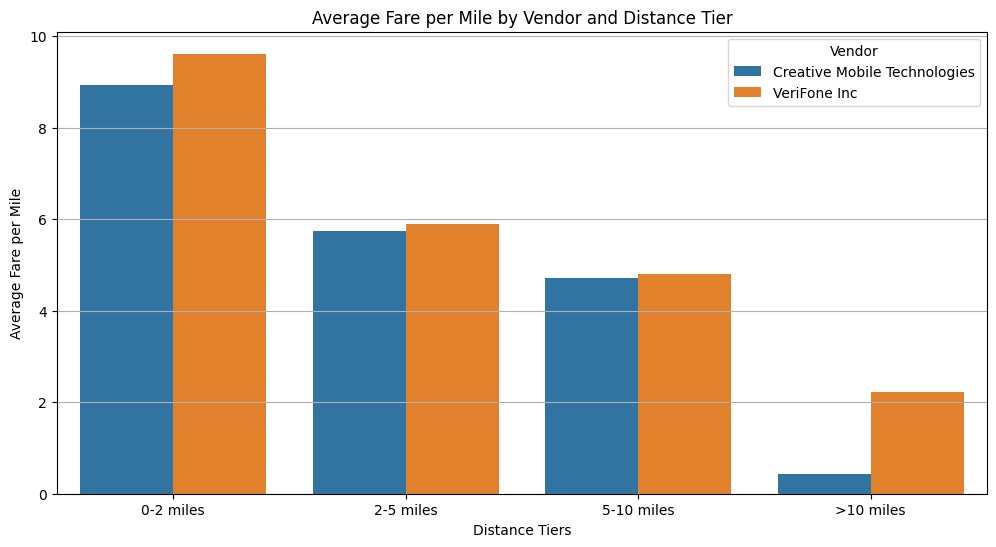

In [448]:
# Defining distance tiers
def distance_tier(distance):
    if distance <= 3:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    elif distance <= 10:
        return '5-10 miles'
    else:
        return '>10 miles'
 
df['distance_tier'] = df['trip_distance'].apply(distance_tier)
fare_per_mile_by_vendor_distance = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
vendor_map = {1: 'Creative Mobile Technologies', 2: 'VeriFone Inc'}
fare_per_mile_by_vendor_distance['VendorID'] = fare_per_mile_by_vendor_distance['VendorID'].map(vendor_map)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=fare_per_mile_by_vendor_distance, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tiers')
plt.ylabel('Average Fare per Mile')
plt.legend(title='Vendor')
plt.grid(axis='y')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

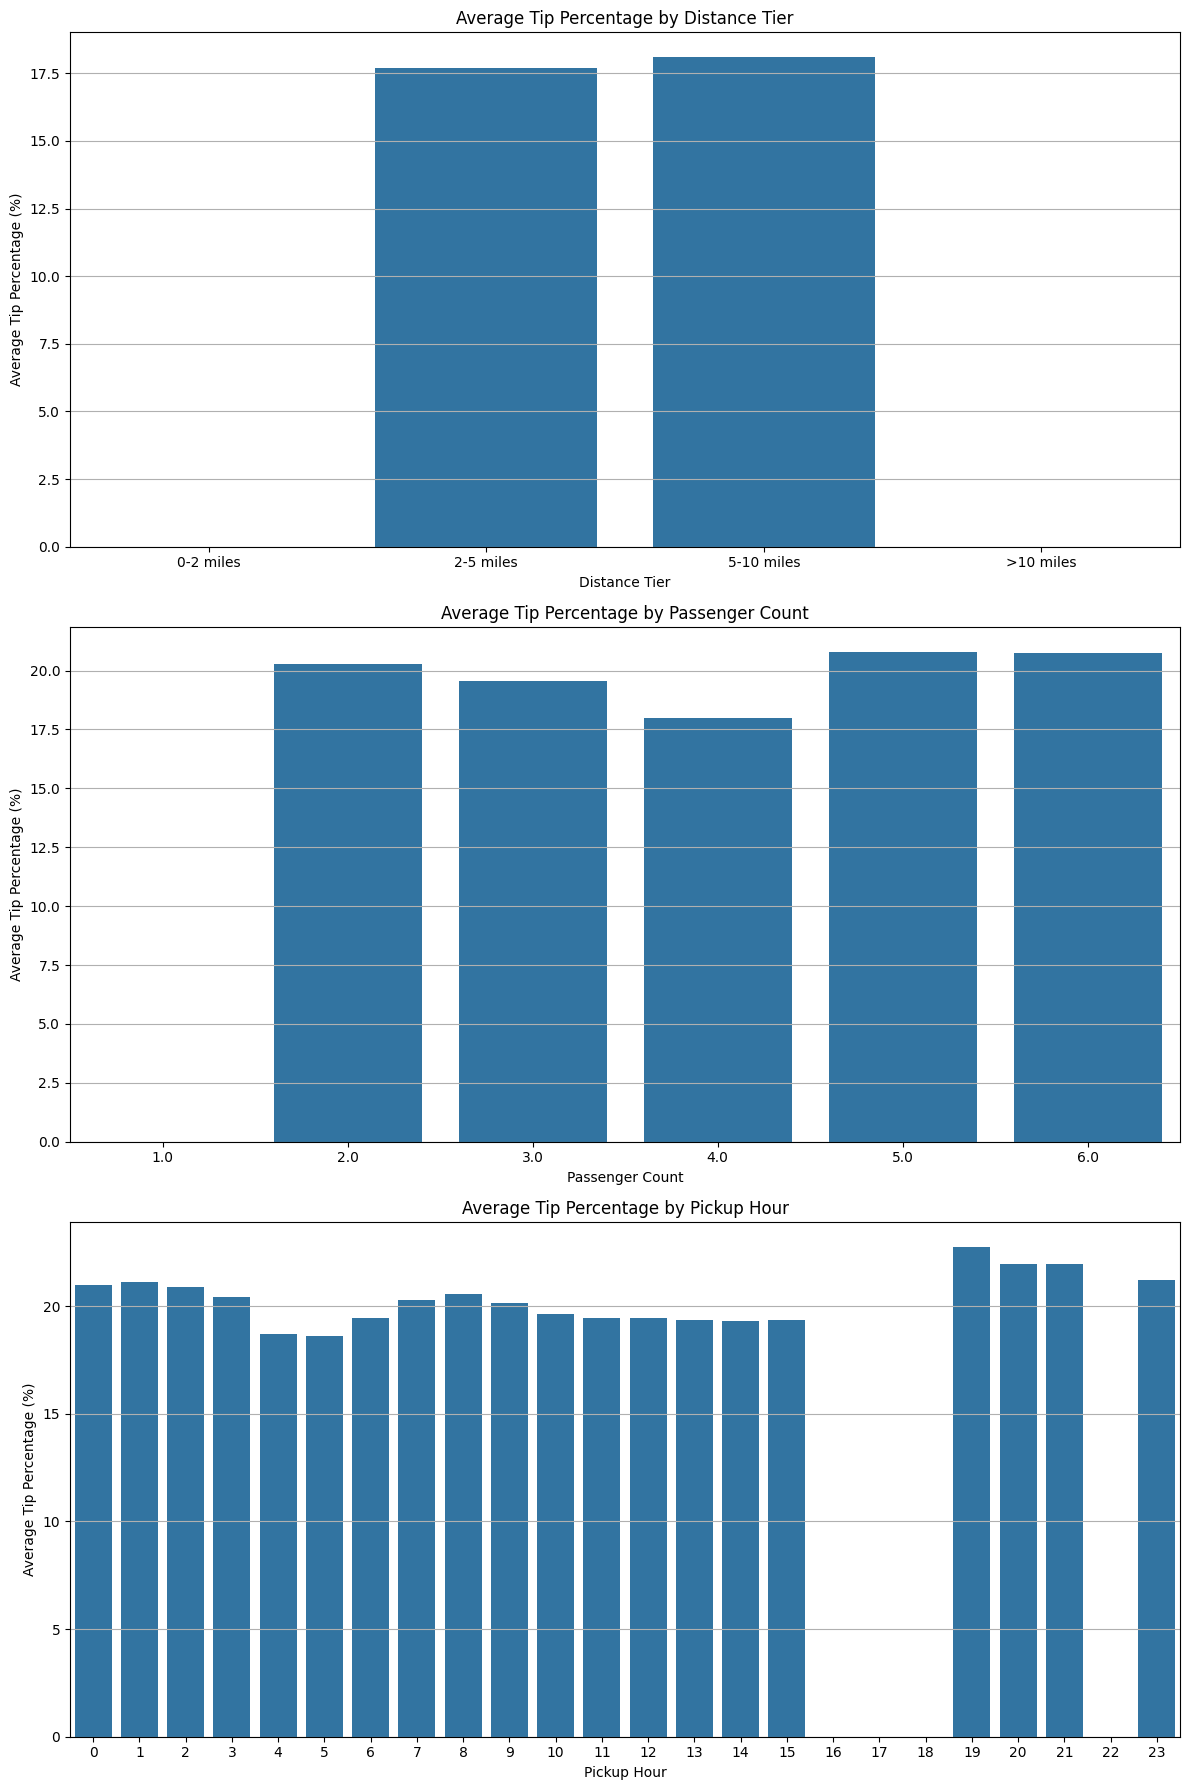

In [449]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
tip_percentage_by_distance = df.groupby('distance_tier')['tip_percentage'].mean().reset_index()
df = df[df['passenger_count'] > 0]
tip_percentage_by_passenger_count = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
tip_percentage_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
# Tip percentage by distance tier
sns.barplot(data=tip_percentage_by_distance, x='distance_tier', y='tip_percentage', ax=axes[0])
axes[0].set_title('Average Tip Percentage by Distance Tier')
axes[0].set_xlabel('Distance Tier')
axes[0].set_ylabel('Average Tip Percentage (%)')
axes[0].grid(axis='y')
# Tip percentage by passenger count
sns.barplot(data=tip_percentage_by_passenger_count, x='passenger_count', y='tip_percentage', ax=axes[1])
axes[1].set_title('Average Tip Percentage by Passenger Count')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Average Tip Percentage (%)')
axes[1].grid(axis='y')
# Tip percentage by pickup hour
sns.barplot(data=tip_percentage_by_hour, x='pickup_hour', y='tip_percentage', ax=axes[2])
axes[2].set_title('Average Tip Percentage by Pickup Hour')
axes[2].set_xlabel('Pickup Hour')
axes[2].set_ylabel('Average Tip Percentage (%)')
axes[2].grid(axis='y')
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

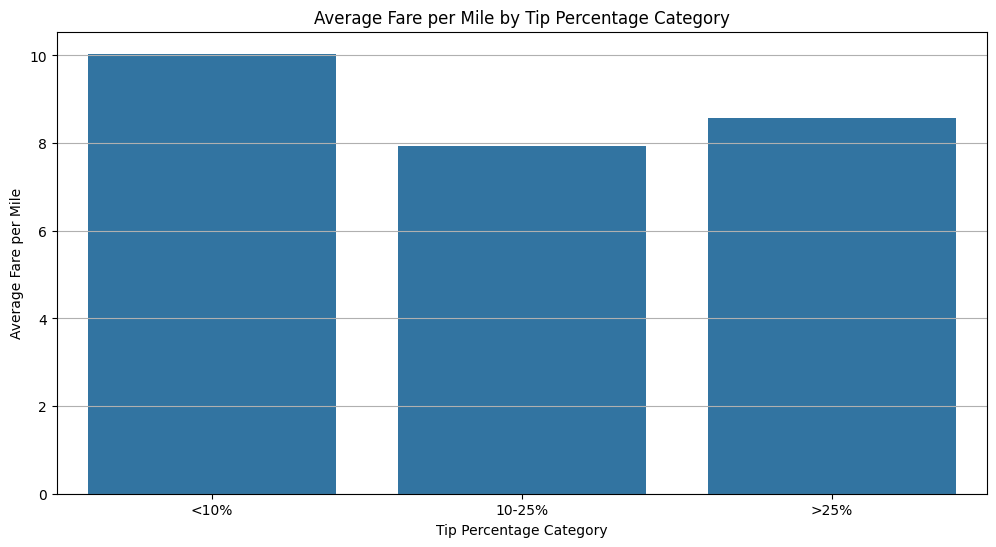

In [450]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df["tip_percentage_category"] = pd.cut(
    df["tip_percentage"], bins=[-1, 10, 25, 100], labels=["<10%", "10-25%", ">25%"]
)
fare_per_mile_by_tip_category = (
    df.groupby("tip_percentage_category", observed=True)["fare_per_mile"]
    .mean()
    .reset_index()
)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=fare_per_mile_by_tip_category, x="tip_percentage_category", y="fare_per_mile"
)
plt.title("Average Fare per Mile by Tip Percentage Category")
plt.xlabel("Tip Percentage Category")
plt.ylabel("Average Fare per Mile")
plt.grid(axis="y")
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

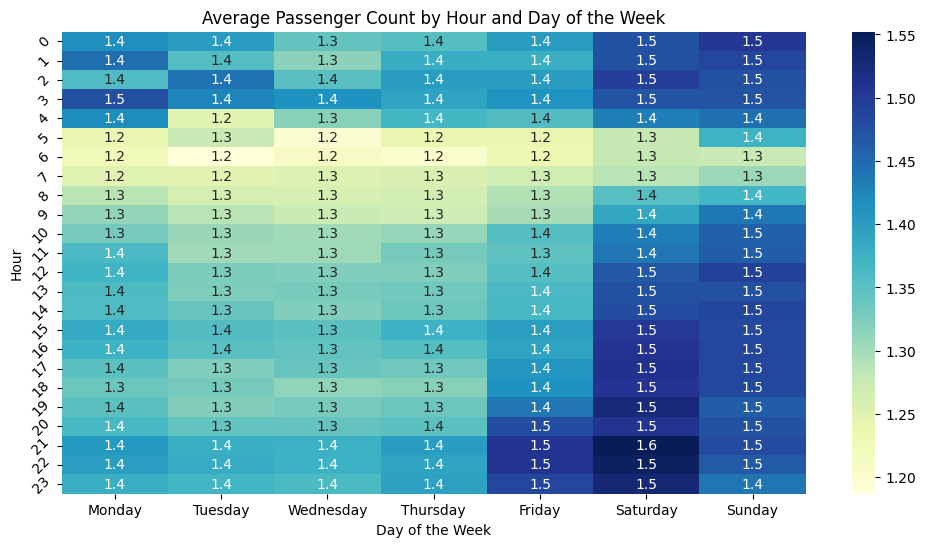

In [463]:
# See how passenger count varies across hours and days
passenger_count_by_hour_day = (
    df.groupby(["pickup_hour", "pickup_day"])["passenger_count"].mean().reset_index()
)
passenger_count_by_hour_day["pickup_day"] = pd.Categorical(
    passenger_count_by_hour_day["pickup_day"],
    categories=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

pivot = passenger_count_by_hour_day.pivot(
    index="pickup_hour", columns="pickup_day", values="passenger_count"
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Average Passenger Count by Hour and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour")
plt.yticks(rotation=45)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [452]:
# How does passenger count vary across zones
passenger_count_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
passenger_count_by_zone = passenger_count_by_zone.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
passenger_count_by_zone = passenger_count_by_zone[['zone', 'passenger_count']].rename(columns={'zone': 'Pickup Zone'})
passenger_count_by_zone.reset_index(drop=True, inplace=True)
print("Average Passenger Count by Pickup Zone")
print(passenger_count_by_zone.sort_values(by='passenger_count', ascending=False).round(2).head(5))

Average Passenger Count by Pickup Zone
             Pickup Zone  passenger_count
157  Ocean Parkway South             6.00
93             Gravesend             3.50
130              Madison             3.00
112      Jamaica Estates             2.67
25           Brownsville             2.50


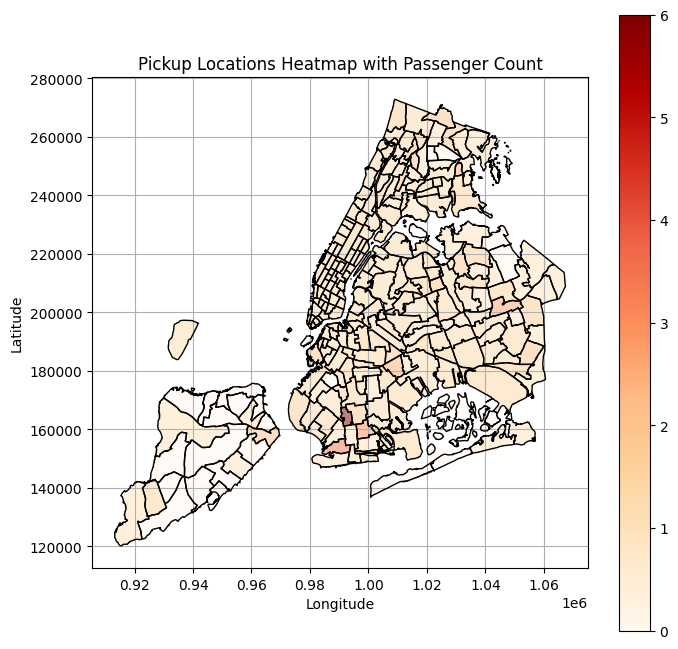

In [453]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
zones_with_trips = zones.merge(passenger_count_by_zone, left_on='zone', right_on='Pickup Zone', how='left')
zones_with_trips['passenger_count'] = zones_with_trips['passenger_count'].fillna(0)

fig, ax = plt.subplots(figsize=(8, 8))
zones_with_trips.boundary.plot(ax=ax, linewidth=1, color='black')
zones_with_trips.plot(column='passenger_count', ax=ax, legend=True, cmap='OrRd', alpha=0.5)
plt.title('Pickup Locations Heatmap with Passenger Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [454]:
# How often is each surcharge applied?
surcharge_counts = df.groupby(['PULocationID', 'DOLocationID'])['congestion_surcharge'].sum().reset_index()
surcharge_counts = surcharge_counts[surcharge_counts['congestion_surcharge'] > 0]
surcharge_counts = surcharge_counts.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
surcharge_counts = surcharge_counts.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_PU', '_DO'))
surcharge_counts = surcharge_counts[['zone_PU', 'zone_DO', 'congestion_surcharge']].rename(columns={'zone_PU': 'Pickup Zone', 'zone_DO': 'Dropoff Zone', 'congestion_surcharge': 'Surcharge Count'})
surcharge_counts.reset_index(drop=True, inplace=True)
print(surcharge_counts.sort_values(by='Surcharge Count', ascending=False).head(5))

                Pickup Zone           Dropoff Zone  Surcharge Count
5551  Upper East Side South  Upper East Side North          30852.5
5434  Upper East Side North  Upper East Side South          26600.0
5552  Upper East Side South  Upper East Side South          20522.5
6510                    NaN                    NaN          20475.0
5433  Upper East Side North  Upper East Side North          19910.0


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [455]:
# Ensure that the date time columns are in the correct format, must use pandas dt to convert to datetime
# Create new columns or variables to store the groupby data to avoid overwriting the original data
# Use plot for visualization to make it easier to see the trends

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [456]:
# With the 2 Vendors, we can see that the average fare per mile is higher for Vendor 2 (VeriFone Inc) than for Vendor 1 (Creative Mobile Technologies). This suggests that customers using VeriFone Inc may be paying more for their rides on average.
# This could be due to various factors such as different pricing strategies, service quality, or customer demographics.

# Customers often use taxis on daytime hours, we must focus on the daytime hours to get a better understanding of the trends.

# Some zones like Upper East North and South have a higher number of pickups and dropoffs

# Customers use taxis more on weekdays than weekends

# The tips are often higher at evening hours and max at 18 PM

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [457]:
# Consider implementing a dynamic pricing model that adjusts fares based on demand, time of day, and distance traveled. This could involve increasing fares during peak hours or in high-demand zones while offering discounts during off-peak times to attract more customers.
# Additionally, consider offering loyalty programs or incentives for frequent riders to encourage repeat business. Finally, analyze customer feedback and satisfaction to ensure that any pricing adjustments do not negatively impact the overall customer experience.
# This could involve conducting surveys or monitoring social media sentiment to gauge customer reactions to pricing changes.